# Exploratory Data Analysis

In [30]:
import pandas as pd
import numpy as np

import seaborn as sns
sns.set(color_codes=True)
%config InlineBackend.figure_formats = ['retina']

import string
from wordcloud import WordCloud
from collections import Counter

import nltk
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk import word_tokenize
from gensim.utils import simple_preprocess

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SUNSHINE\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [15]:
frame=pd.read_csv("frame.csv")

## Stats and KDE plot

Mean: 41808.56543209877
SD: 14908.086378056547


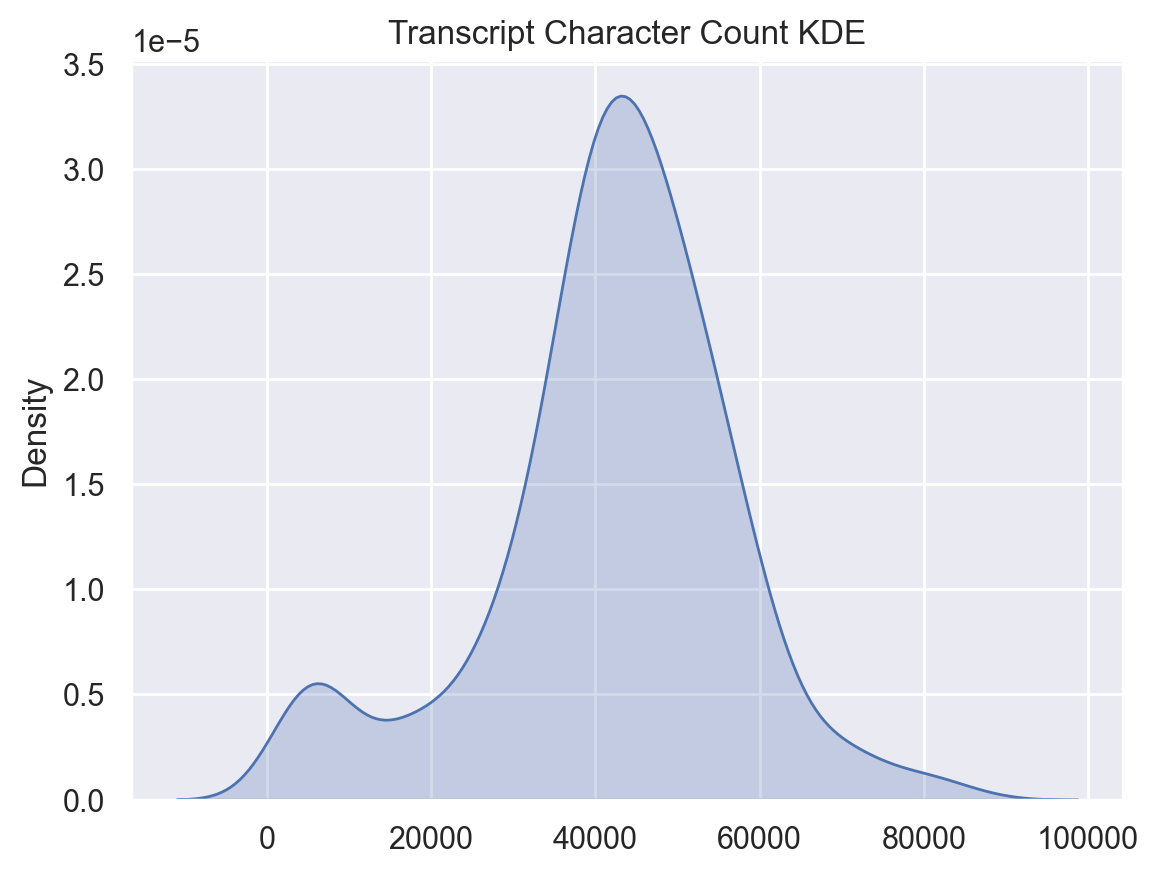

In [16]:
# Stats and KDE(Kernel Density Estimation) plot for character count of each transcript
x = [len(x) for x in frame.Transcript]
ax = sns.kdeplot(x, shade=True, color="b")
ax.set_title('Transcript Character Count KDE')
mean = np.array(x).mean()
sd = np.array(x).std()
print(f'Mean: {mean}')
print(f'SD: {sd}')

Mean: 68.67415730337079
SD: 18.04241275433326


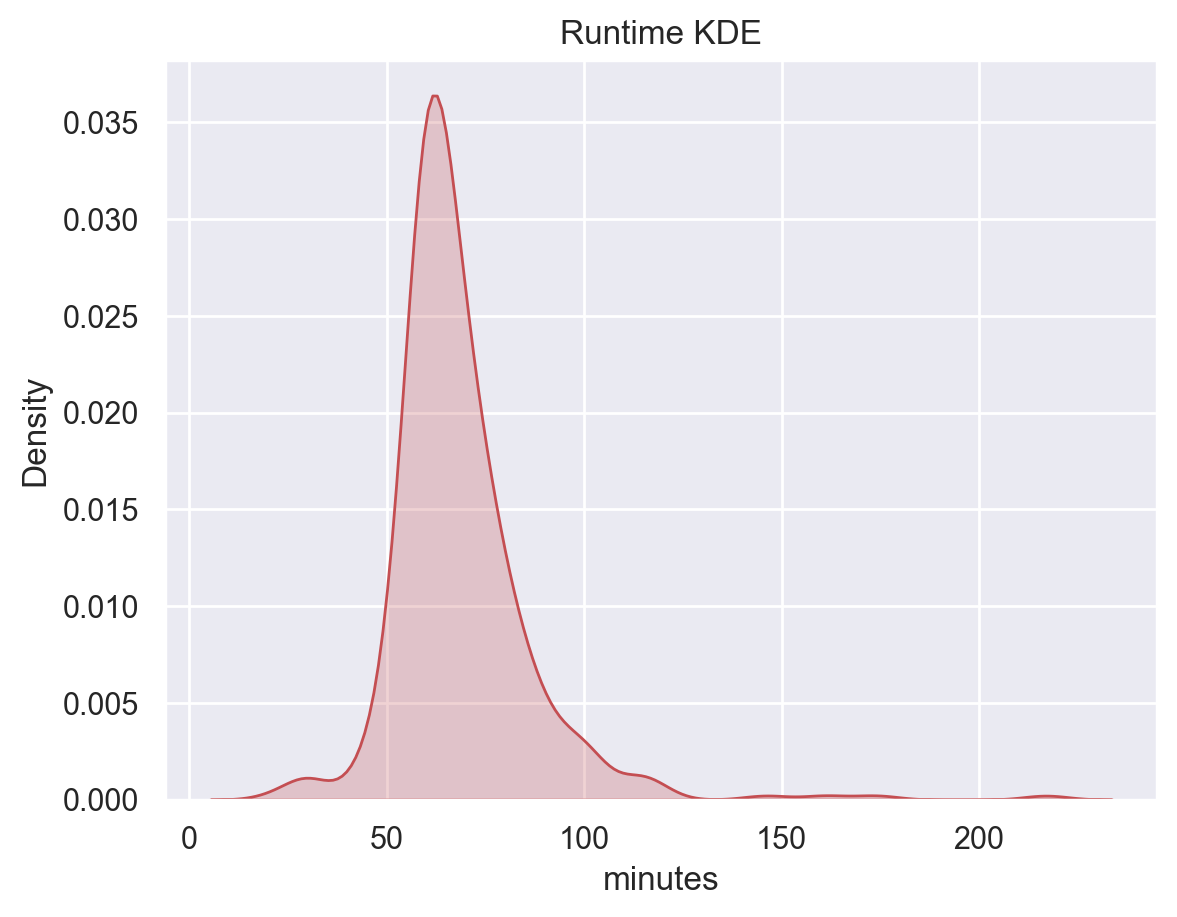

In [17]:
# Stats and KDE plot for runtime of each performance
x = []
count = 0
for i in frame.runtime:
    if (i > 0):
        count += 1
        x.append(int(i))
ax = sns.kdeplot(x, shade=True, color="r")   
ax.set_title('Runtime KDE')
ax.set(xlabel='minutes')
mean = np.array(x).mean()
sd = np.array(x).std()
print(f'Mean: {mean}')
print(f'SD: {sd}')

Mean: 7.172957746478872
SD: 0.9101623355687047


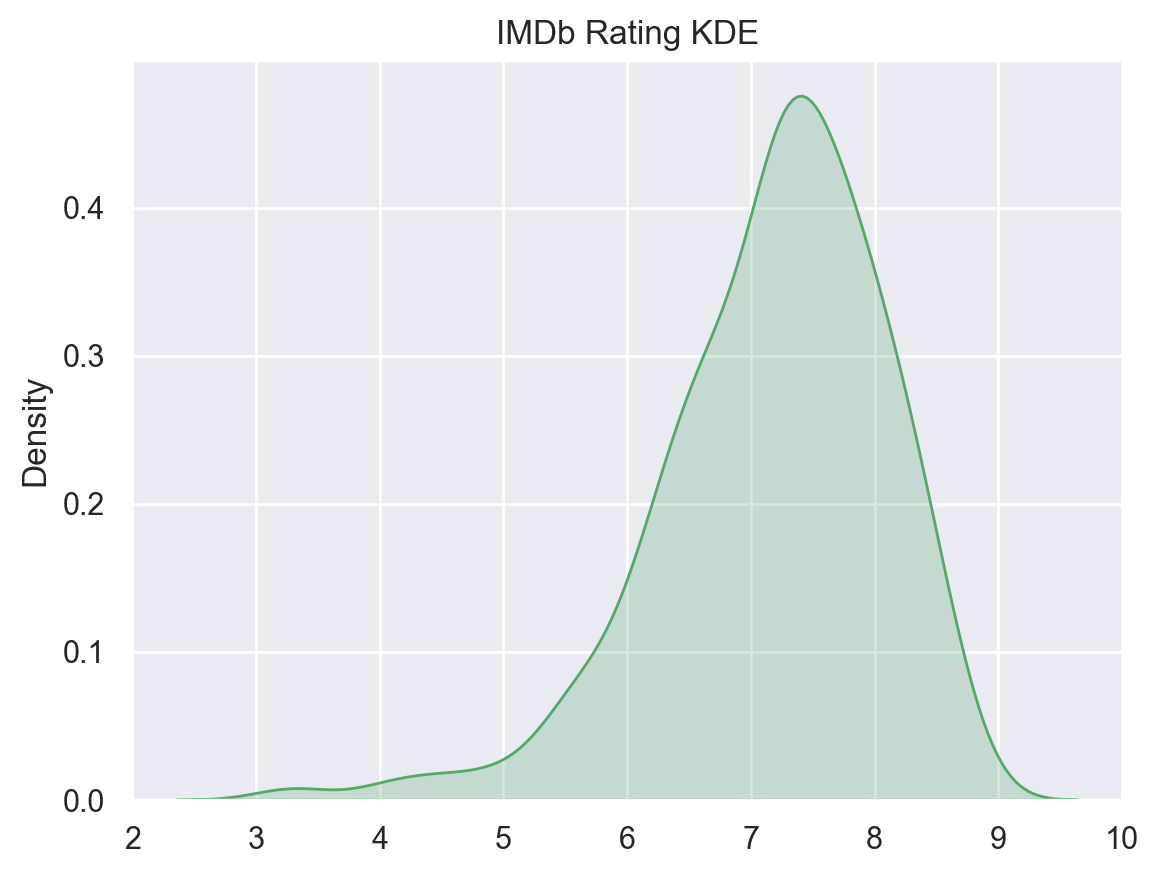

In [20]:
# Stats and KDE plot for IMDb rating of each performance
x = []
count = 0
for i in frame.rating:
    if (i > 0):
        count += 1
        x.append(i)
ax = sns.kdeplot(x, shade=True, color="g")   
ax.set_title('IMDb Rating KDE')
mean = np.array(x).mean()
sd = np.array(x).std()
print(f'Mean: {mean}')
print(f'SD: {sd}')

## Rating Type
Give a 1 for any rating above the mean, and a 0 otherwise. This will be our target for a classification .

[Text(0.5, 1.0, 'Counts of specials with higher or lower than average ratings')]

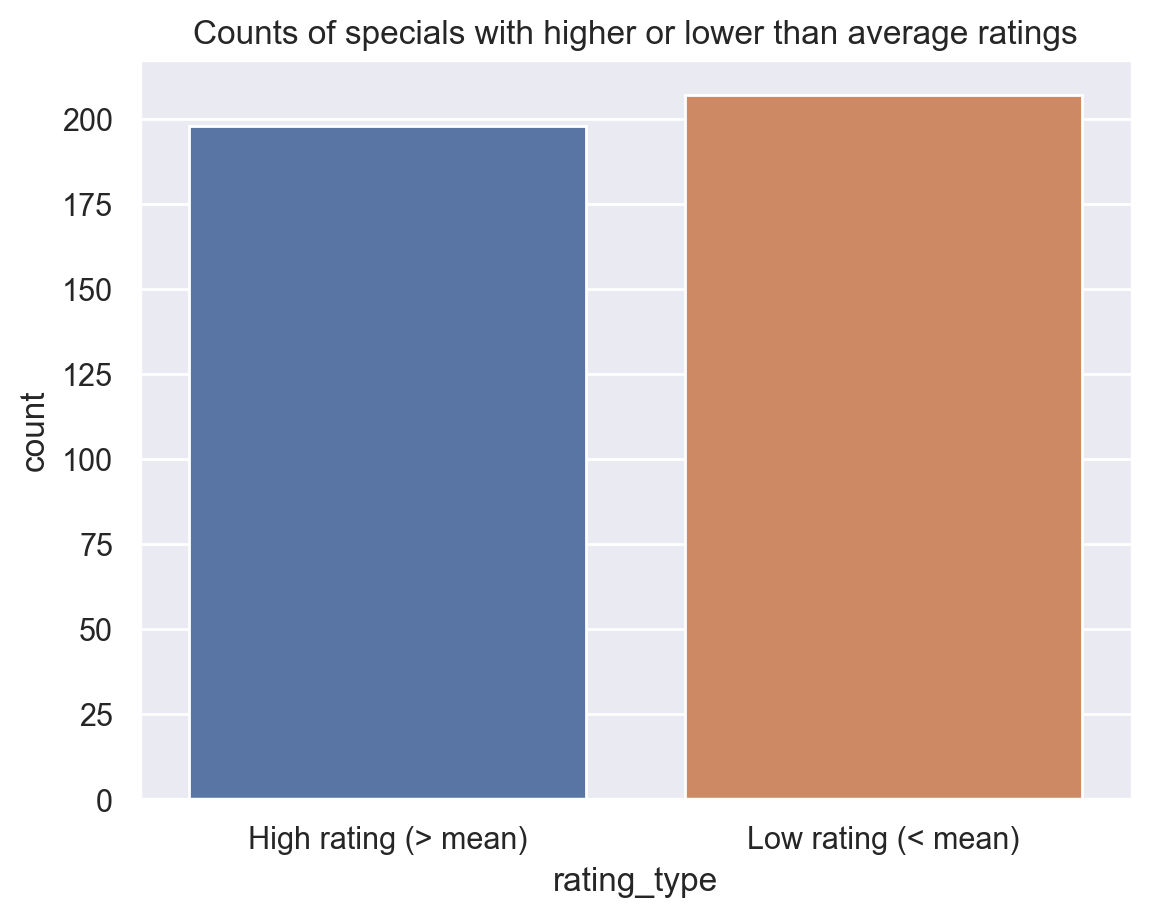

In [22]:
frame['rating_type'] = frame.rating.apply(lambda x: 1 if x >= frame.rating.mean() else 0)
ax = sns.countplot(x='rating_type', data=frame)
ax.set(xticklabels=['High rating (> mean)', 'Low rating (< mean)'])
ax.set(title='Counts of specials with higher or lower than average ratings')

## Most Common Words

In [24]:
# Form the document-term matrix
cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(frame.Transcript)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_dtm.index = frame.index
data = data_dtm.transpose()

In [25]:
# top 30 words said by each comedian
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))
top_dict

{0: [('like', 191),
  ('know', 95),
  ('goes', 93),
  ('im', 74),
  ('dont', 51),
  ('right', 38),
  ('youre', 32),
  ('just', 30),
  ('did', 27),
  ('hes', 26),
  ('think', 25),
  ('yeah', 23),
  ('uh', 22),
  ('said', 22),
  ('people', 21),
  ('theyre', 19),
  ('shes', 19),
  ('thats', 19),
  ('fuckin', 17),
  ('gonna', 17),
  ('didnt', 17),
  ('fuck', 16),
  ('feel', 16),
  ('doing', 15),
  ('really', 15),
  ('room', 15),
  ('say', 15),
  ('tell', 14),
  ('tom', 14),
  ('time', 13)],
 1: [('know', 81),
  ('going', 80),
  ('just', 76),
  ('good', 56),
  ('thats', 56),
  ('like', 54),
  ('hes', 53),
  ('dont', 52),
  ('got', 52),
  ('come', 50),
  ('people', 45),
  ('god', 40),
  ('oh', 39),
  ('think', 39),
  ('yes', 35),
  ('im', 33),
  ('right', 33),
  ('big', 28),
  ('did', 27),
  ('ive', 26),
  ('look', 25),
  ('said', 23),
  ('bit', 23),
  ('okay', 23),
  ('hell', 21),
  ('youre', 20),
  ('man', 20),
  ('head', 19),
  ('fit', 19),
  ('bloody', 18)],
 2: [('like', 132),
  ('said'

In [28]:
# most common top words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)   
# most common words along with how many routines they occur in
Counter(words).most_common()

[('know', 392),
 ('dont', 392),
 ('like', 389),
 ('im', 389),
 ('just', 388),
 ('thats', 381),
 ('right', 348),
 ('got', 342),
 ('youre', 325),
 ('people', 310),
 ('think', 250),
 ('gonna', 250),
 ('oh', 232),
 ('want', 217),
 ('yeah', 213),
 ('time', 212),
 ('say', 199),
 ('hes', 185),
 ('good', 180),
 ('said', 174),
 ('going', 170),
 ('shit', 170),
 ('did', 169),
 ('cause', 168),
 ('theyre', 160),
 ('fuck', 159),
 ('man', 158),
 ('look', 139),
 ('fucking', 136),
 ('theres', 136),
 ('thing', 131),
 ('really', 126),
 ('little', 126),
 ('come', 122),
 ('okay', 117),
 ('guy', 113),
 ('didnt', 97),
 ('love', 89),
 ('guys', 85),
 ('ive', 83),
 ('thank', 65),
 ('shes', 63),
 ('tell', 62),
 ('mean', 62),
 ('hey', 61),
 ('way', 61),
 ('ill', 60),
 ('make', 59),
 ('goes', 57),
 ('white', 53),
 ('day', 53),
 ('uh', 52),
 ('god', 50),
 ('black', 50),
 ('went', 47),
 ('kids', 42),
 ('lot', 42),
 ('women', 41),
 ('aint', 40),
 ('gotta', 36),
 ('feel', 34),
 ('need', 32),
 ('wanna', 32),
 ('doing',

  				Joe List: I Hate Myself 


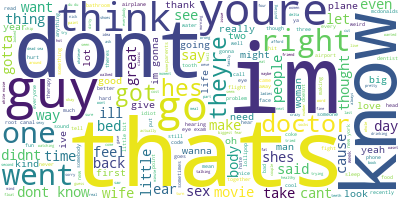

In [35]:
# word cloud to visualize the most common words.
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='midnightblue')
print(frame.Title[60])
wordcloud.generate(' '.join(frame.words[60]))
wordcloud.to_image()

## Size of Vocabulary

In [31]:
# Tokenization words with Gensim simple_preprocess method
stop_words = stopwords.words('english')
stop_words.extend(['audience', 'laughter', 'laughing', 'announcer', 'narrator', 'cos']) # Extra words to remove, specific to this dataset

# Tokenize, lowercase, remove punctuation and remove stopwords in one line
frame['words'] = frame.Transcript.apply(lambda x: [word for word in simple_preprocess(x, deacc=True) if word not in stop_words])

# word count
frame['word_count'] = frame.words.apply(lambda x: len(x))

## Amount of Profanity

In [32]:
# Count the number of times an 'F' or 'S' word is used, then remove them
def get_swear_counts(input_list, swear_list):
    swears = 0
    for word in input_list:
        if word.lower()in swear_list:
            swears += 1
    return swears

f_words = ['fuck', 'fucking', 'fckin','fucken','fucked','fck','fcking','fuckin', 'fucker', 'muthafucka', 'motherfuckers', 'motherfucke','motha','motherfucking','motherfuckin','motherfuckers', 'motherfucker']
s_words = ['shit', 'shitter', 'shitting', 'shite', 'bullshit', 'shitty']

frame['f_words'] = frame.words.apply(lambda x: get_swear_counts(x, f_words))
frame['s_words'] = frame.words.apply(lambda x: get_swear_counts(x, s_words))

swears = f_words + s_words + ['cunt', 'asshole', 'damn', 'goddamn', 'cocksucker','sluts','dicks','dick','pussy','ass','asshole','assholes','porn','penis','tit']

frame['words'] = frame.words.apply(lambda x: [word for word in x if word not in swears])

# Feature Engineering
diversity_ratio feature : (diversity of words) / (total words)

In [40]:
frame['diversity'] = frame.words.apply(lambda x: len(set(x)))
frame['diversity_ratio'] = frame.diversity / frame.word_count

# correlations

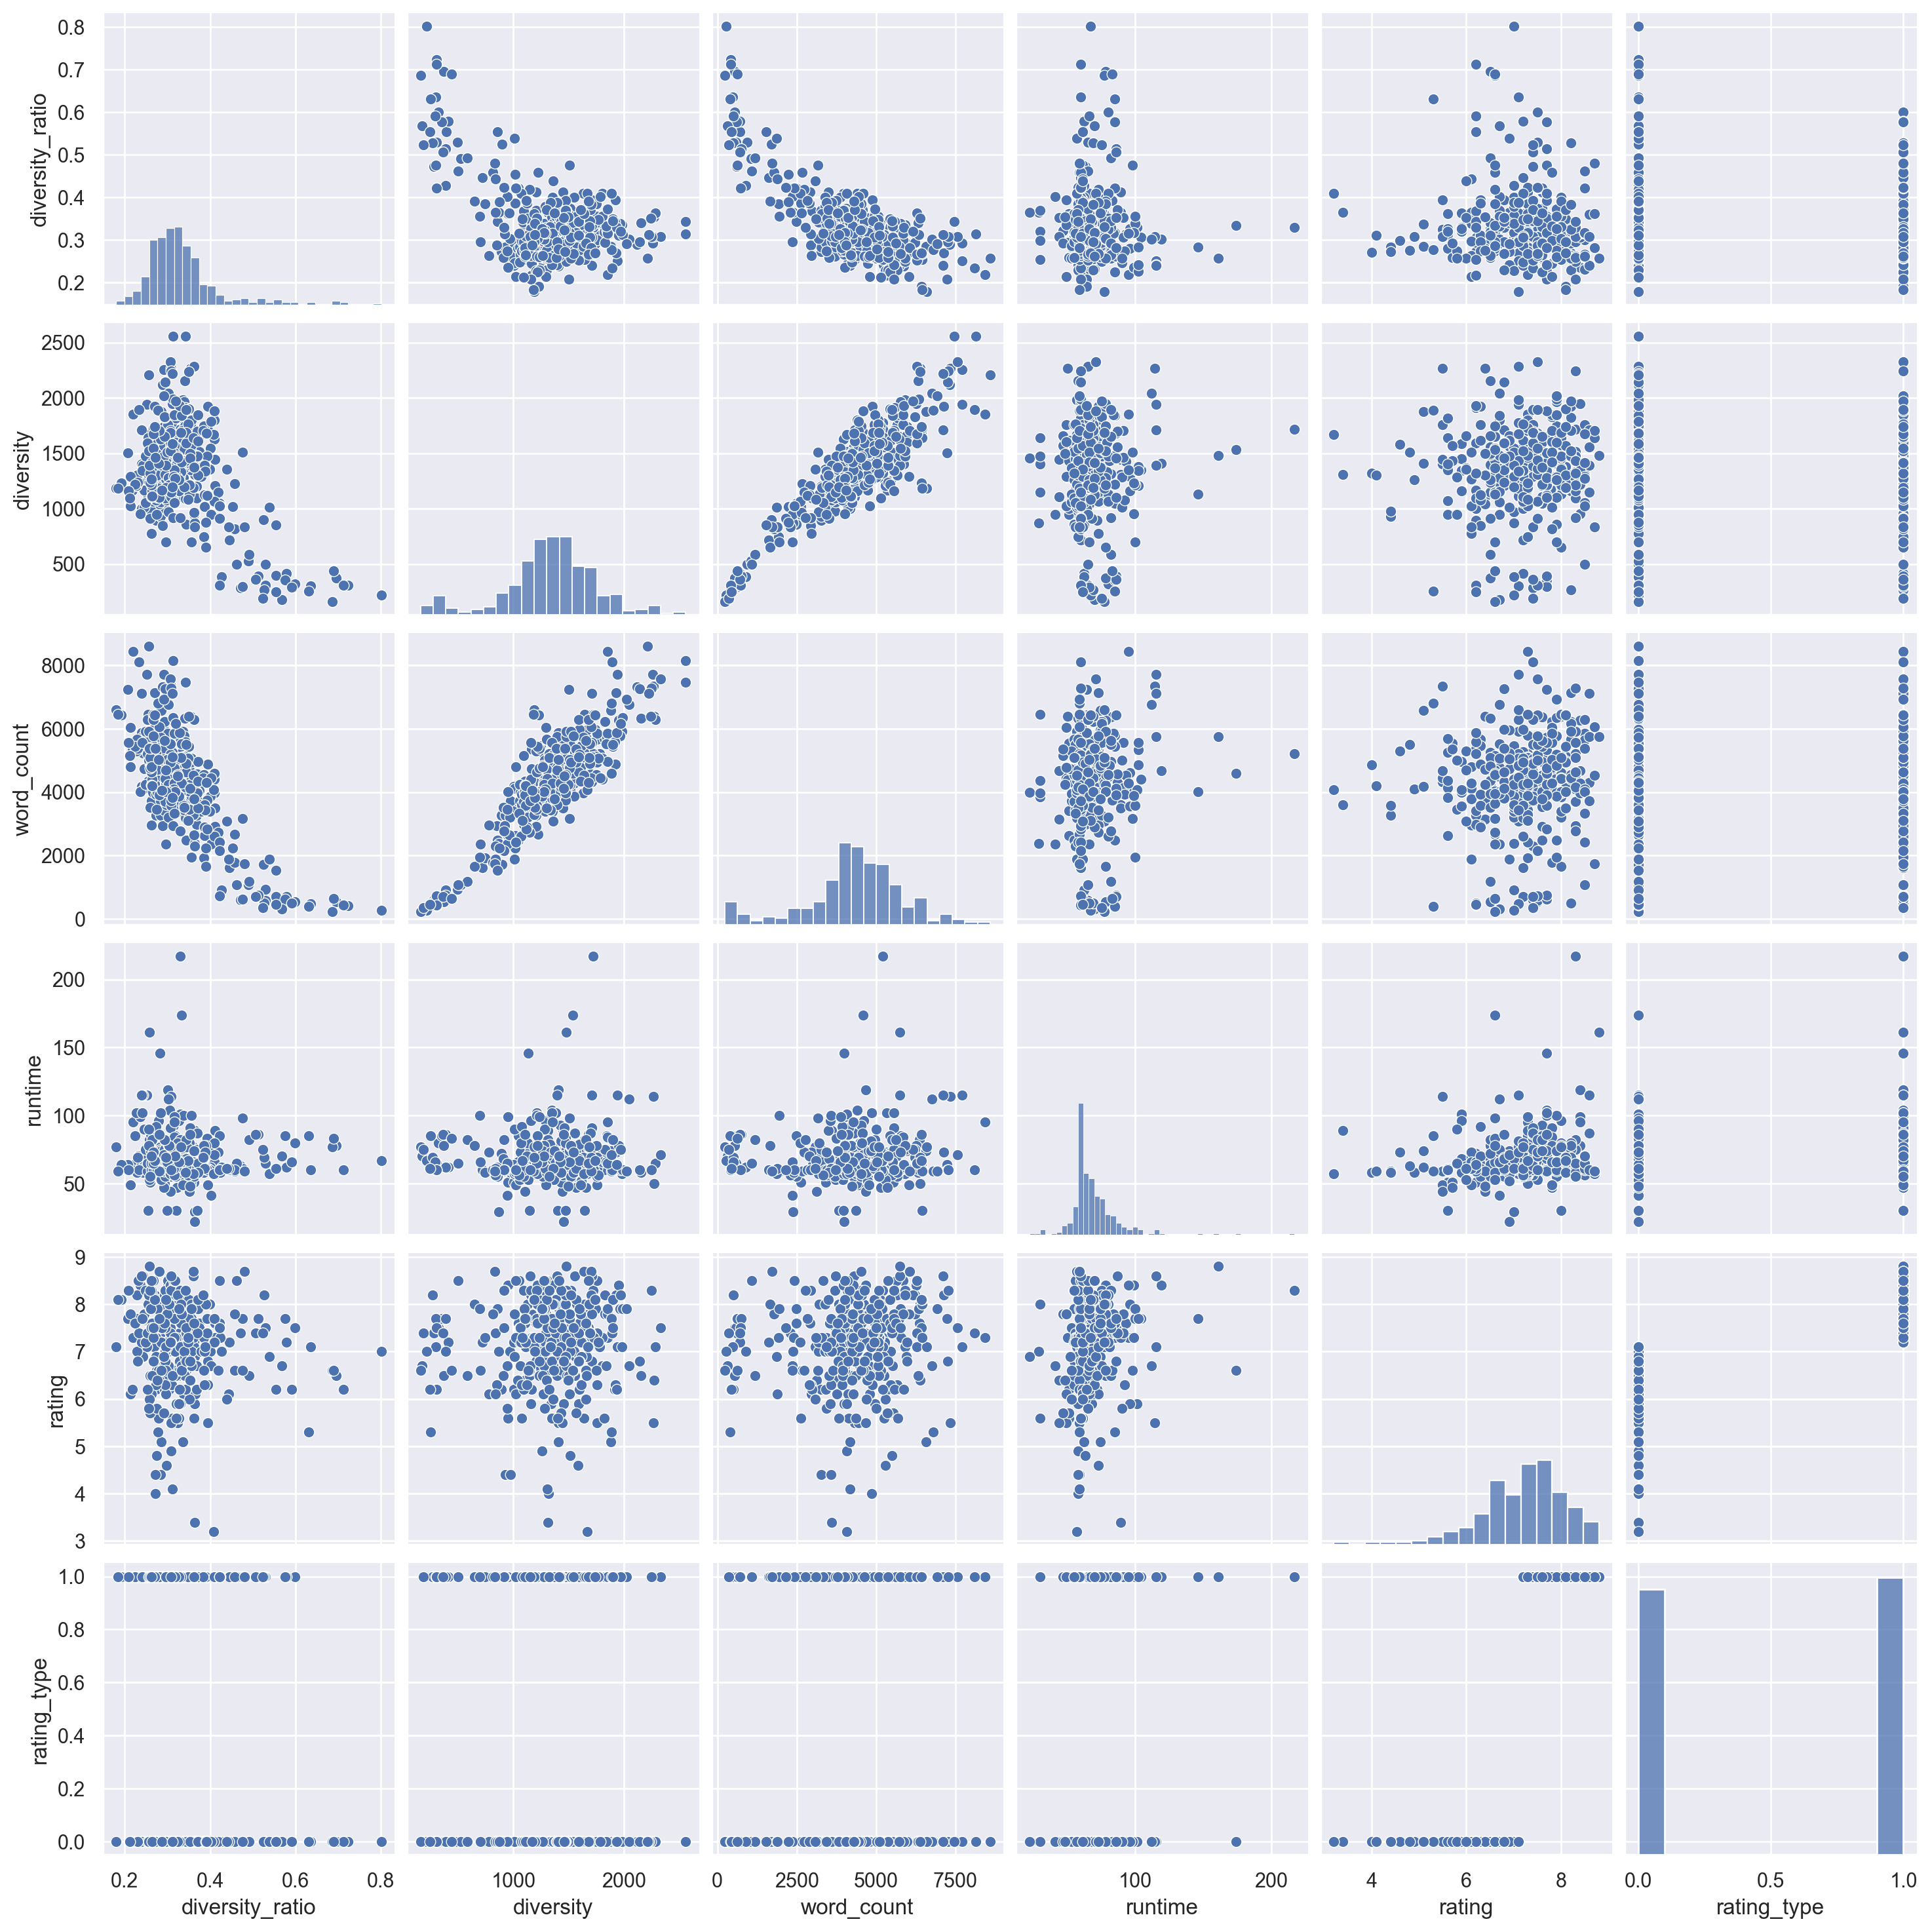

In [42]:
sns.pairplot(frame[['diversity_ratio', 'diversity', 'word_count', 'runtime', 'rating', 'rating_type']])

In [43]:
# Saving the csv file
frame.to_csv("frame2.csv", index=False)